# Lab 2


## Read and explore data

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
cali_df = pd.read_csv('ST83446_california_housing.csv')


In [3]:
cali_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [4]:
cali_df.shape

(300, 7)

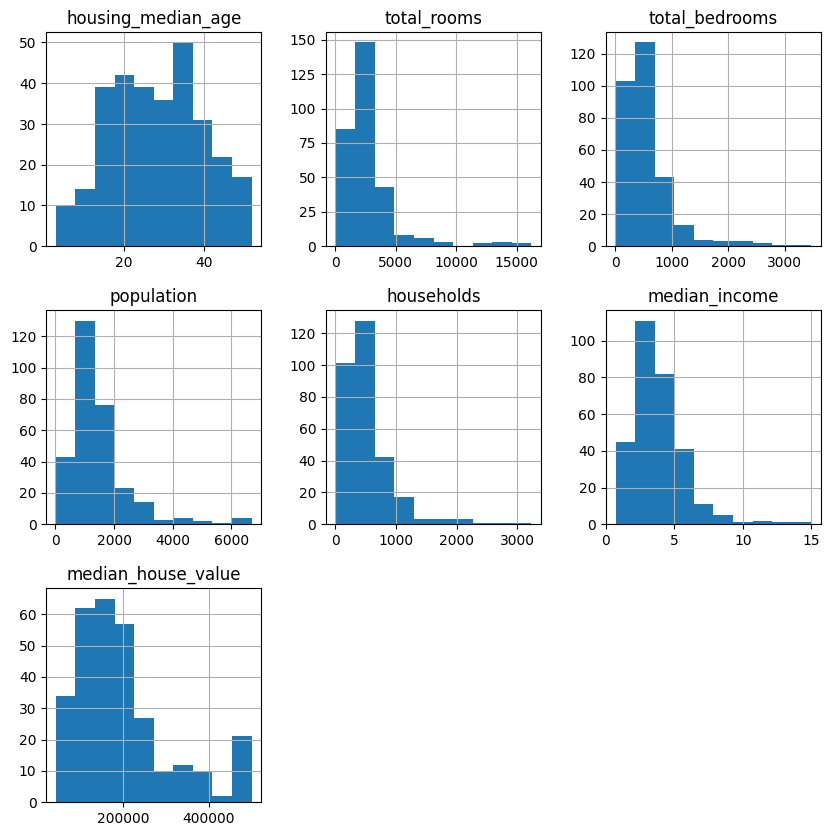

In [5]:
cali_df[cali_df.columns].hist(figsize=(10,10));

In [6]:
cali_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
housing_median_age,300.0,28.34,11.84,3.00,19.00,29.00,36.25,52.0
total_rooms,300.0,2700.71,2267.50,37.00,1516.00,2149.00,3100.00,16222.0
total_bedrooms,300.0,567.14,445.46,10.00,315.50,447.00,682.50,3474.0
population,300.0,1472.68,1056.08,14.00,838.75,1216.00,1762.25,6700.0
households,300.0,525.15,402.46,7.00,297.75,423.50,620.75,3232.0
median_income,300.0,3.78,1.91,0.71,2.53,3.47,4.66,15.0
median_house_value,300.0,199332.06,114547.80,43900.00,120000.00,171900.00,234425.00,500001.0


## Dendrograms using L2 and L1 form

In [11]:
S_SIZE = 8
M_SIZE = 12
L_SIZE = 16


plt.rc('font', size=S_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=S_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=M_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=S_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=S_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=S_SIZE)    # legend fontsize
plt.rc('figure', titlesize=L_SIZE)  # fontsize of the figure title

In [25]:
# ward and centroid requires L2
L2_linkage_ward = linkage(cali_df, method='ward', metric='euclidean')
L2_linkage_centroid = linkage(cali_df, method='centroid', metric='euclidean')
L1_linkage_complete = linkage(cali_df, method='complete', metric='cityblock')
L2_linkage_complete = linkage(cali_df, method='complete', metric='euclidean')
L1_linkage_weighted = linkage(cali_df, method='weighted', metric='cityblock')
L2_linkage_weighted = linkage(cali_df, method='weighted', metric='euclidean')

In [37]:
# helper function
def links(variable):
    dendrogram(variable)
    ax = plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=10)
    variable_name = [name for name, value in globals().items() if value is variable][0]
    plt.title(variable_name.split('_')[0] + ' ' + variable_name.split('_')[2])
    plt.show


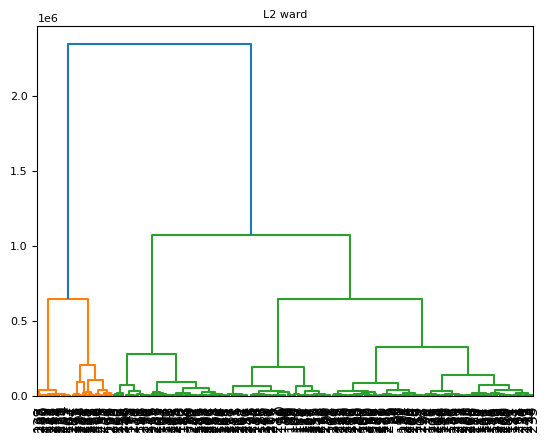

In [38]:
links(L2_linkage_ward)

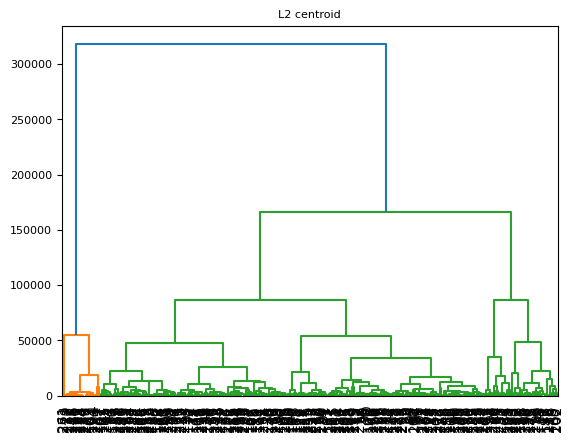

In [39]:
links(L2_linkage_centroid)

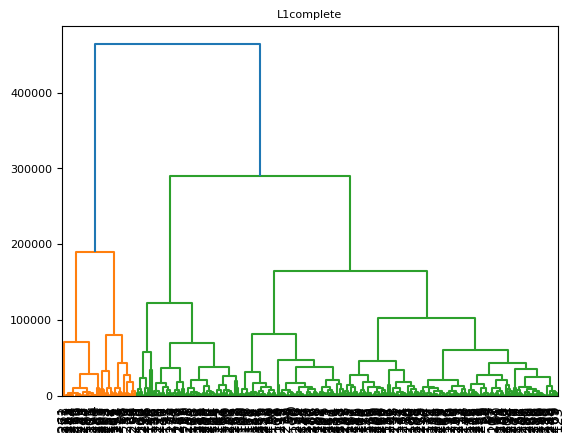

In [23]:
links(L1_linkage_complete)

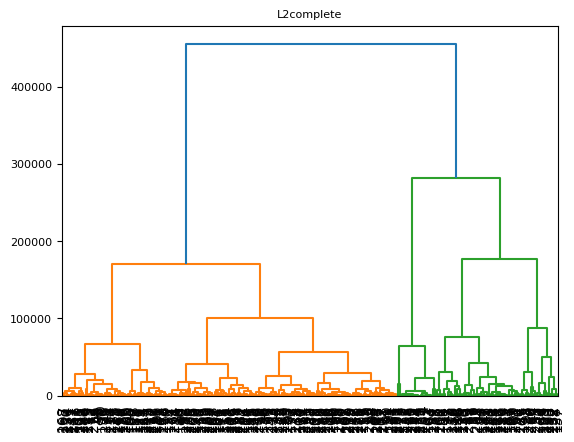

In [24]:
links(L2_linkage_complete)

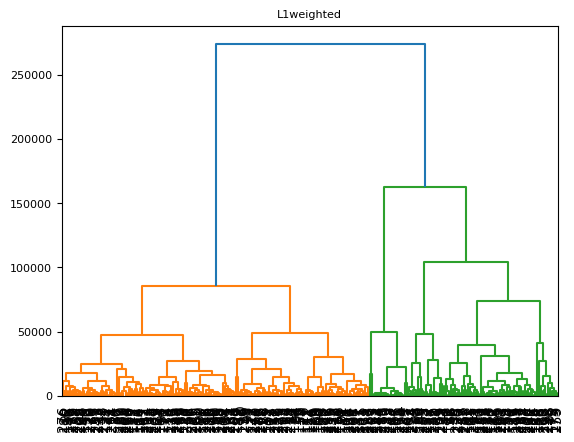

In [26]:
links(L1_linkage_weighted)

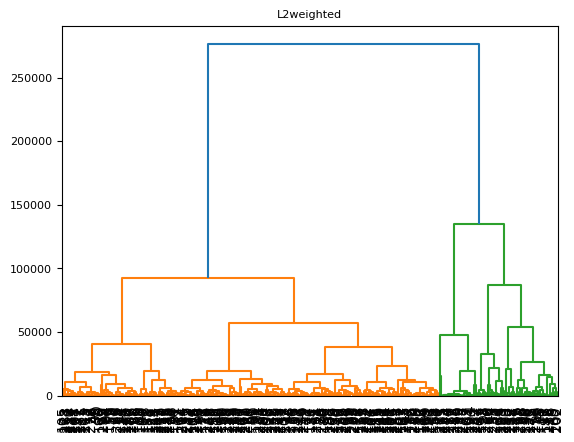

In [27]:
links(L2_linkage_weighted)

## Standardization


In [30]:
scaler = StandardScaler()
mat = cali_df.values 
cali_scaled_df = scaler.fit_transform(mat)

In [35]:
scaledL2_linkage_ward = linkage(cali_scaled_df, method='ward', metric='euclidean')
scaledL2_linkage_centroid = linkage(cali_scaled_df, method='centroid', metric='euclidean')
scaledL1_linkage_complete = linkage(cali_scaled_df, method='complete', metric='cityblock')
scaledL2_linkage_complete = linkage(cali_scaled_df, method='complete', metric='euclidean')
scaledL1_linkage_weighted = linkage(cali_scaled_df, method='weighted', metric='cityblock')
scaledL2_linkage_weighted = linkage(cali_scaled_df, method='weighted', metric='euclidean')

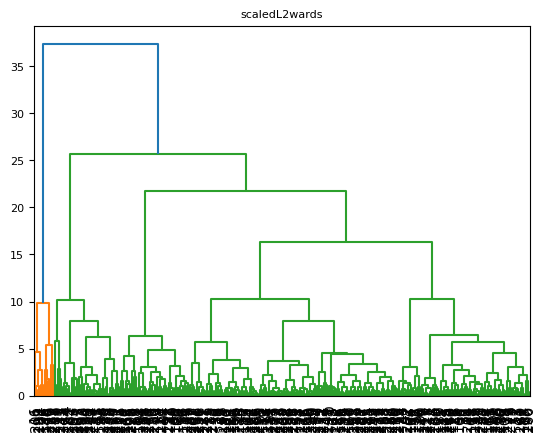

In [36]:
links(scaledL2_linkage_ward)

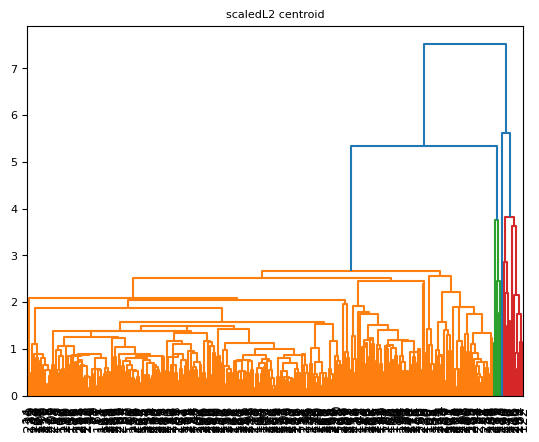

In [40]:
links(scaledL2_linkage_centroid)

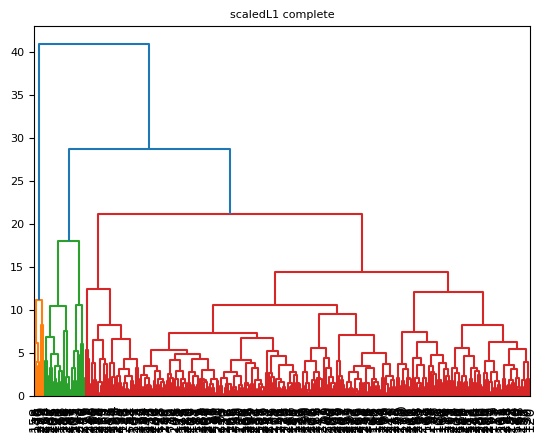

In [41]:
links(scaledL1_linkage_complete)

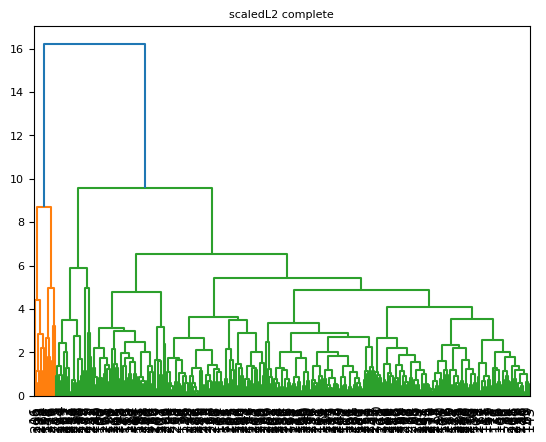

In [42]:
links(scaledL2_linkage_complete)

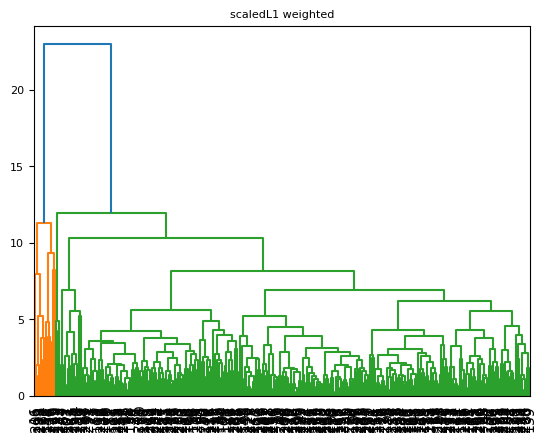

In [43]:
links(scaledL1_linkage_weighted)

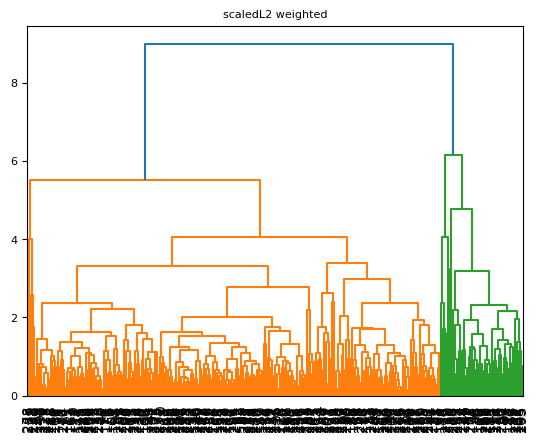

In [44]:
links(scaledL2_linkage_weighted)